name : Antoine-Valentin CHARPENTIER  
ID : d23antch

# Import packages

In [729]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Data

In this first step, we will import the dataset and rename the columns based on the information provided on the dataset download site. This will help us have descriptive column names that indicate the meaning of each attribute, replacing generic labels like X1, X2, and so on.

I assume here that the dataset has been downloaded from the website https://archive.ics.uci.edu/dataset/242/energy+efficiency, extracted next to the notebook, and that the Excel file containing the data under the name ENB2012_data.xlsx.

In [730]:
columns_names = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution', 'Heating Load', 'Cooling Load']

In [731]:
dataset = pd.read_excel('./ENB2012_data.xlsx', names=columns_names)

Let's have a quick look in our data.

In [732]:
dataset.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


The dependent variables in our study are 'Heating Load' and 'Cooling Load'. 

To predict these loads, we will use various independent variables at our disposal, including 'Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', and 'Glazing Area Distribution'.

In [733]:
dependant_variables = columns_names[-2:]
independant_variables = columns_names[:-2]

In [734]:
print(f'Dependant variables : {dependant_variables}')
print(f'Independant variables : {independant_variables}')

Dependant variables : ['Heating Load', 'Cooling Load']
Independant variables : ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']


Now, we can examine the types of variables, whether they are numerical, categorical, or if they have null values, to guide our preprocessing and analysis decisions.

In [735]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


For each variable, we can seek to determine whether it is a numerical or categorical variable. This information is crucial in determining which pre-treatment and analysis methods are appropriate for each variable.

In [736]:
qualitative_columns = dataset.select_dtypes(include='object').columns
quantitative_columns = dataset.select_dtypes(include='number').columns
print("Qualitative (categorical)")
for feat in qualitative_columns:
    print(' - ', feat)
print("Quantitative (numerical)")
for feat in quantitative_columns:
    print(' - ', feat)

Qualitative (categorical)
Quantitative (numerical)
 -  Relative Compactness
 -  Surface Area
 -  Wall Area
 -  Roof Area
 -  Overall Height
 -  Orientation
 -  Glazing Area
 -  Glazing Area Distribution
 -  Heating Load
 -  Cooling Load


We observe that our dataset consists solely of quantitative variables and no qualitative (categorical) variables. Therefore, there is no need to perform any specific encoding for categorical variables.

# 1. Data preparation
## 1.1 Perform exploratory data analysis (EDA)
> **Subject :** Perform exploratory data analysis (EDA) to understand the distribution of variables, identify outliers, and check for missing values.
### Check for missing values.
We will conduct an assessment to identify the presence of any missing values within the dataset

In [737]:
missing_values = dataset.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64


As you can see, this dataset contains no missing values. So, there is no need to delete columns or perform imputations for the analysis

### Univariate analysis

We can look to spot potential issues such as missing values, outliers, or inconsistencies in the data we have, using the summary statistics.

In [738]:
dataset.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Now, let's analyze the distribution of variables to identify potential trends or peculiarities.

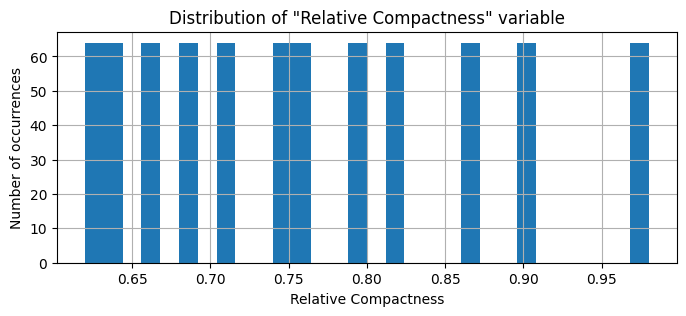

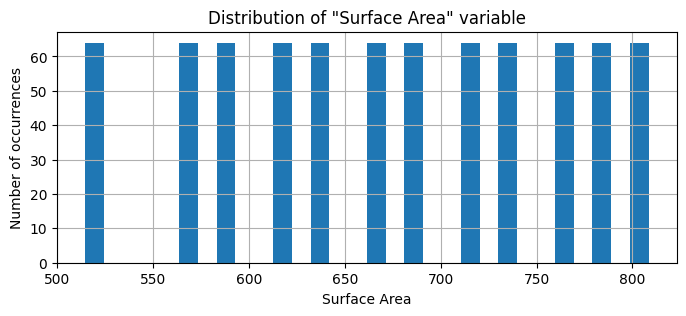

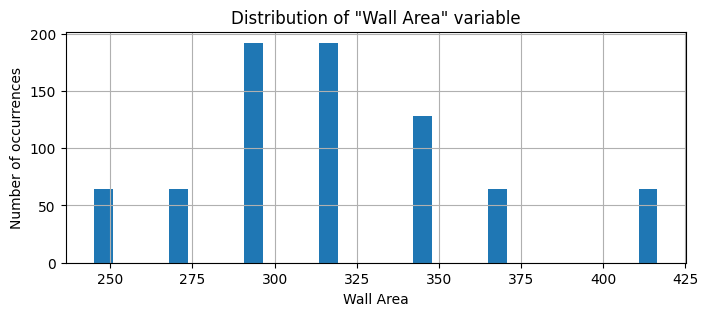

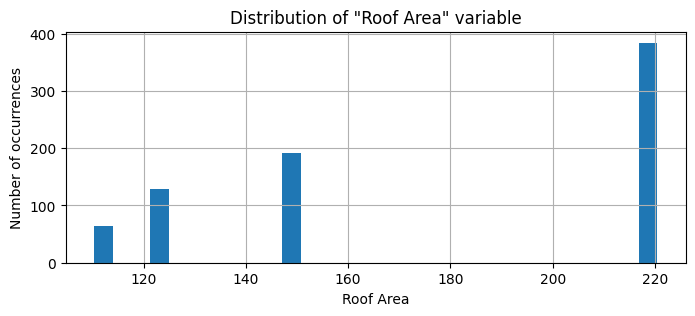

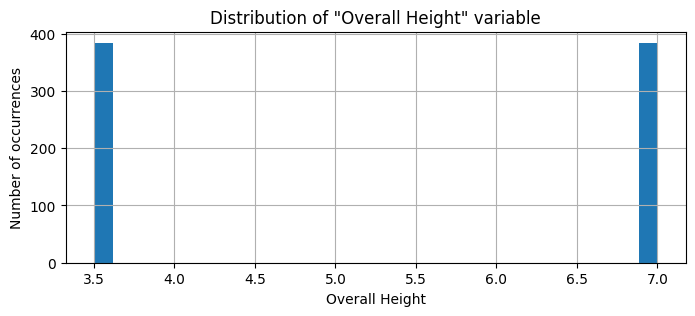

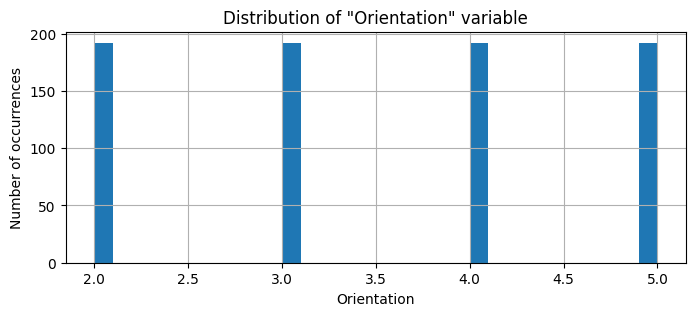

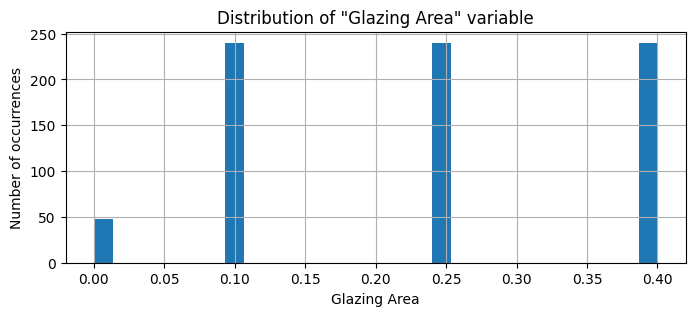

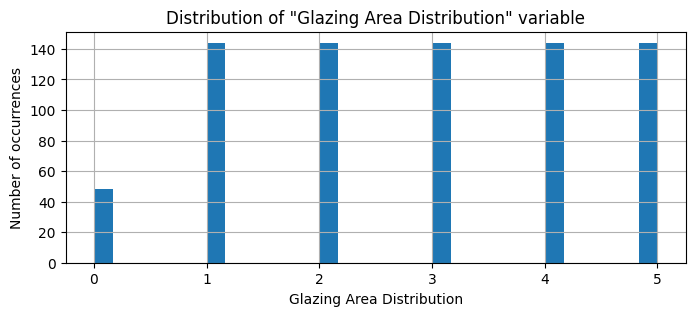

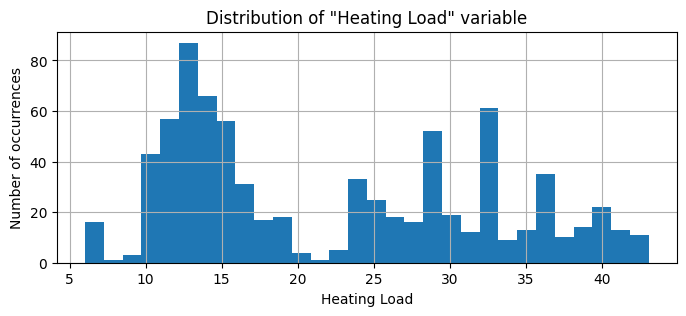

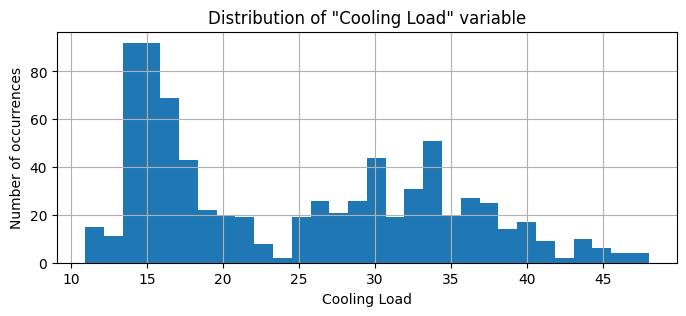

In [739]:
for variable in columns_names:
    plt.figure(figsize = (8,3))
    dataset[variable].hist(bins=30)
    plt.title(f'Distribution of "{variable}" variable')
    plt.ylabel('Number of occurrences')
    plt.xlabel(variable)
    plt.show()

The preceding graphs suggest that our independent variables take on discrete values rather than continuous ones. 

It's therefore possible to display the number of unique values for each variable.

In [740]:
for variable in columns_names:
    unique, counts = np.unique(dataset[variable], return_counts=True)
    print(f"Number of unique values for '{variable}': {len(unique)}")
    if len(unique) < 15:
        print(f' -> Values : {unique}')

Number of unique values for 'Relative Compactness': 12
 -> Values : [0.62 0.64 0.66 0.69 0.71 0.74 0.76 0.79 0.82 0.86 0.9  0.98]
Number of unique values for 'Surface Area': 12
 -> Values : [514.5 563.5 588.  612.5 637.  661.5 686.  710.5 735.  759.5 784.  808.5]
Number of unique values for 'Wall Area': 7
 -> Values : [245.  269.5 294.  318.5 343.  367.5 416.5]
Number of unique values for 'Roof Area': 4
 -> Values : [110.25 122.5  147.   220.5 ]
Number of unique values for 'Overall Height': 2
 -> Values : [3.5 7. ]
Number of unique values for 'Orientation': 4
 -> Values : [2 3 4 5]
Number of unique values for 'Glazing Area': 4
 -> Values : [0.   0.1  0.25 0.4 ]
Number of unique values for 'Glazing Area Distribution': 6
 -> Values : [0 1 2 3 4 5]
Number of unique values for 'Heating Load': 587
Number of unique values for 'Cooling Load': 636


These discrete values can be explained by the characteristics of our dataset. Indeed, our dataset was constructed using 12 different building shapes simulated in Ecotect. Since the various independent variables correspond to physical data (building characteristics) that do not change over time, it is normal to find a fixed number of unique values, which is 12 in this case. When the number of unique values is less than 12, it means that several buildings share the same value. However, for the dependent variables, we obtain continuous values. This can be explained by the fact that the data at our disposal were collected repeatedly over time, with multiple measurements for the same building.

It is important to note that here, if we had more data on additional buildings, all independent variables would take continuous values, except for the orientation and glazing area distribution variables. Indeed, the orientation variable indicates the way the building is oriented (North, South, East, West), encoded in numerical form.

It would be necessary to encode the orientation to avoid any implicit hierarchy in the data. The numerical values of orientation could be misinterpreted by a machine learning model as implying an order. In the next section, we will use an encoding algorithm to correctly represent this categorical variable without introducing false order relationships in the machine learning model.

However, I have decided not to encode the variable 'Glazing Area Distribution' in order to preserve the hierarchy.


Let's now focus on outliers. To do so, I've chosen to use boxplots to visualize the distribution of our variables and identify any outliers.

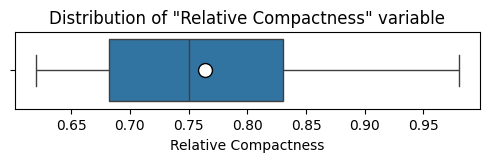

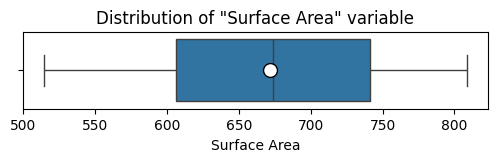

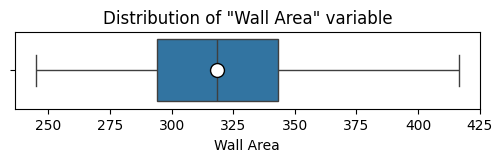

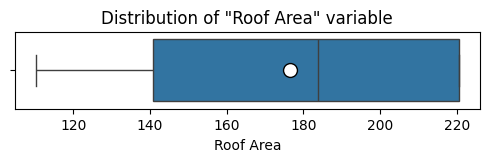

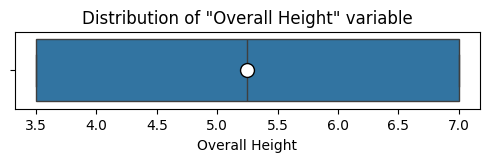

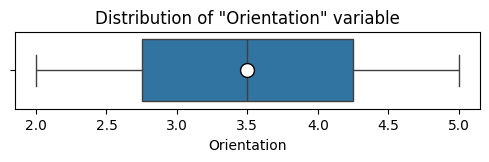

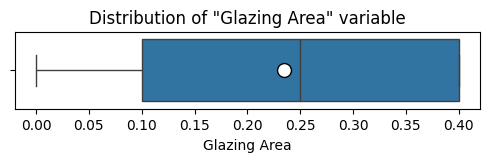

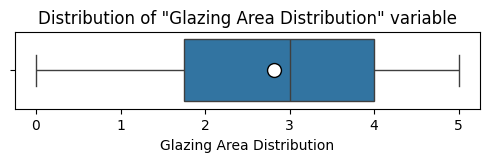

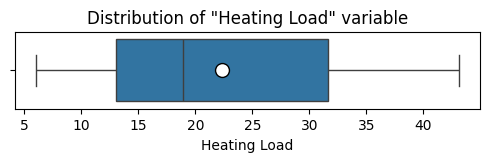

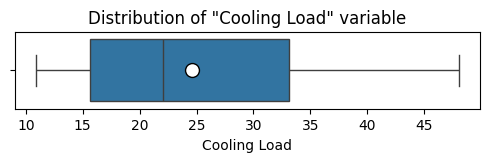

In [741]:
for variable in columns_names:
    plt.figure(figsize = (6,1))
    sb.boxplot(x=dataset[variable], 
           showmeans = True,  
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},
           )
    plt.title(f'Distribution of "{variable}" variable')
    plt.show()

It seems that there are no outliers, as our boxplot graphs do not show points beyond the boundaries defined by the boxes. This indicates a relatively uniform distribution without apparent outliers

## 1.2 Bivariate Analysis
> **Subject :** Visualize the relationships between the independent variables and the target variable using appropriate plots.

To visualize this relationship, I decided to use scatterplots with the independent variable values on the x-axis and a dependent variable on the y-axis. Initially, I had placed both dependent variables on the same graphs with different colors, but this led to readability issues and difficulties in identifying patterns. Consequently, I chose to separate the analysis of each independent/dependent variable into distinct graphs. Additionally, I decided to encode the color of the points based on the type of load to facilitate interpretation.

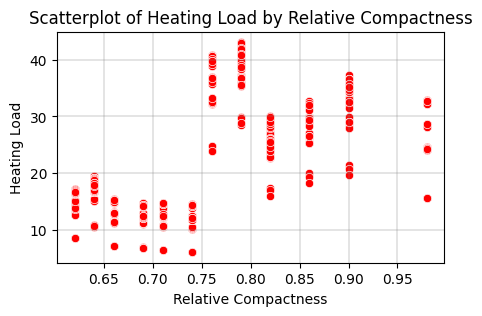

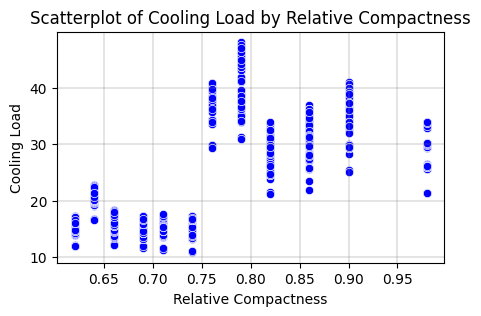

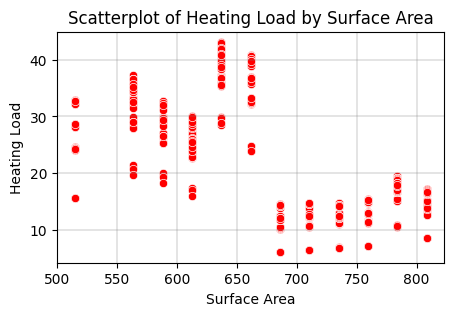

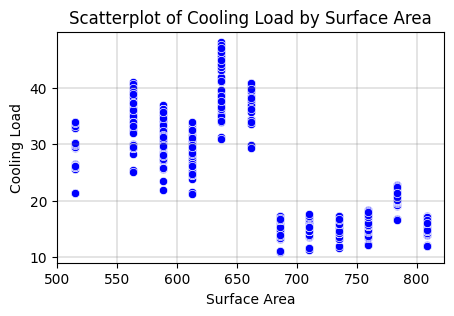

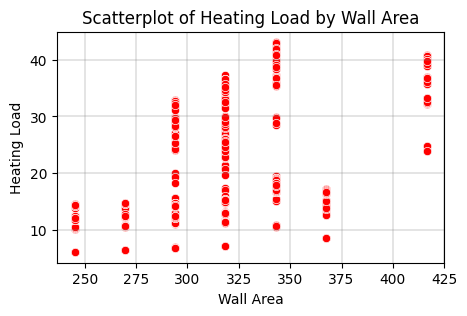

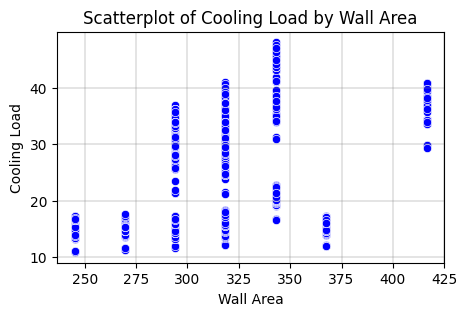

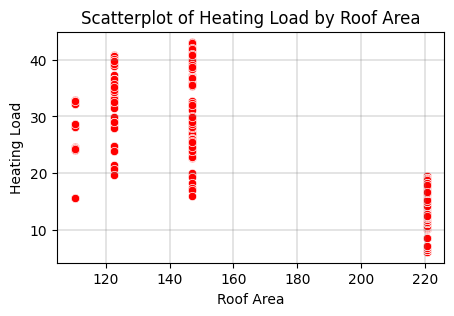

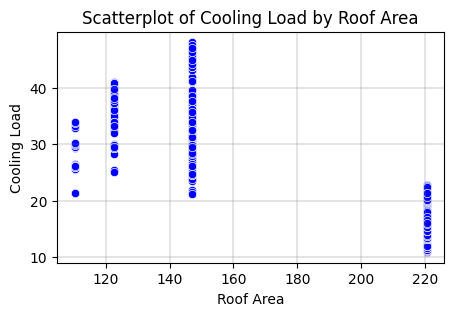

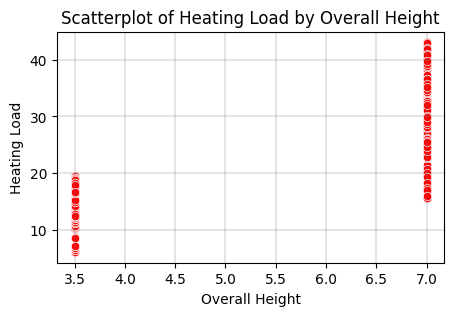

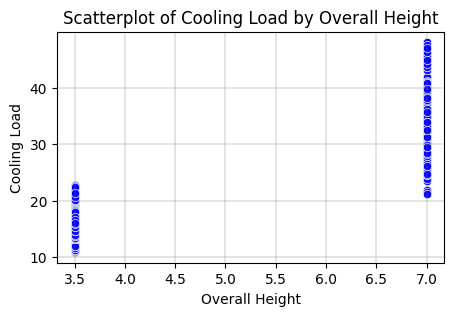

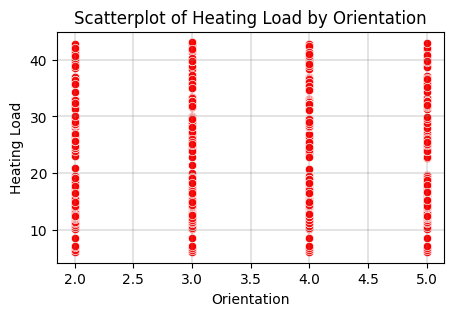

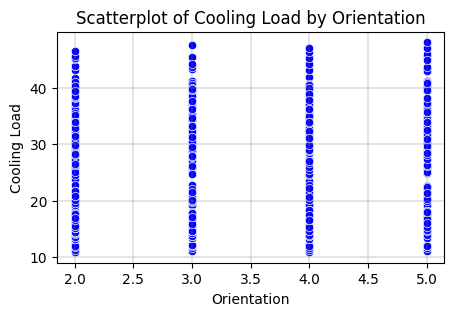

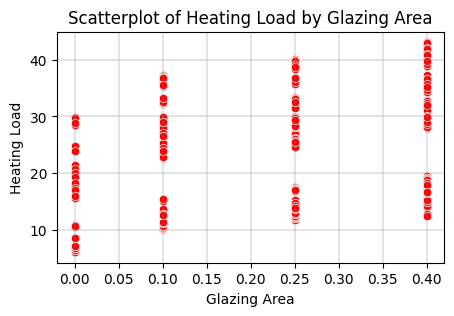

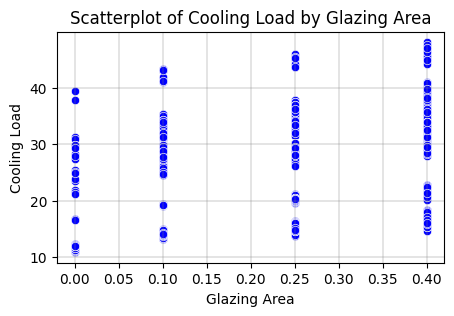

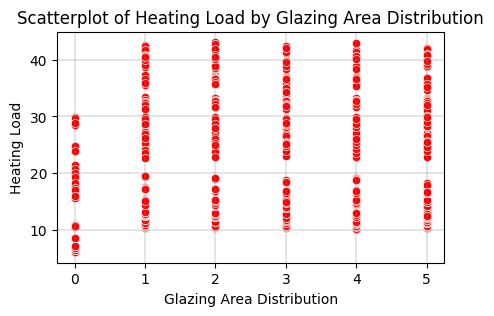

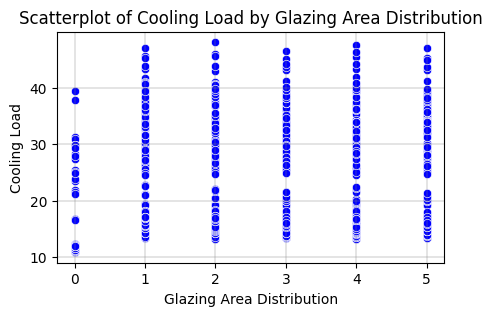

In [742]:
for variable in independant_variables:
    for load_type in dependant_variables:
        color = "red" if load_type == "Heating Load" else "blue"

        plt.figure(figsize=(5, 3))

        sb.scatterplot(x=variable, y=load_type, data=dataset, color=color);
        plt.title(f"Scatterplot of {load_type} by {variable}")
        plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
        plt.show()

Following this bivariate analysis, no clear trend emerges. It is not evident to discern a significant relationship between the heating/cooling loads and an independent variable. In that cases, it would be necessary to use machine learning algorithms to predict these dependent variables, which may reveal more complex or non-linear relationships that are not easily apparent in the bivariate analysis.

## 1.3 Feature selection & transformation
> **Subject :** If necessary, perform feature selection or transformation to enhance the quality of input variables.
### 1.3.1 Feature selection

Pour déterminer si nous devons ou non drop certaines variables, nous devons étudier la corrélations entre nos différentes variables afin de réduire la dimensionalité de notre dataset.

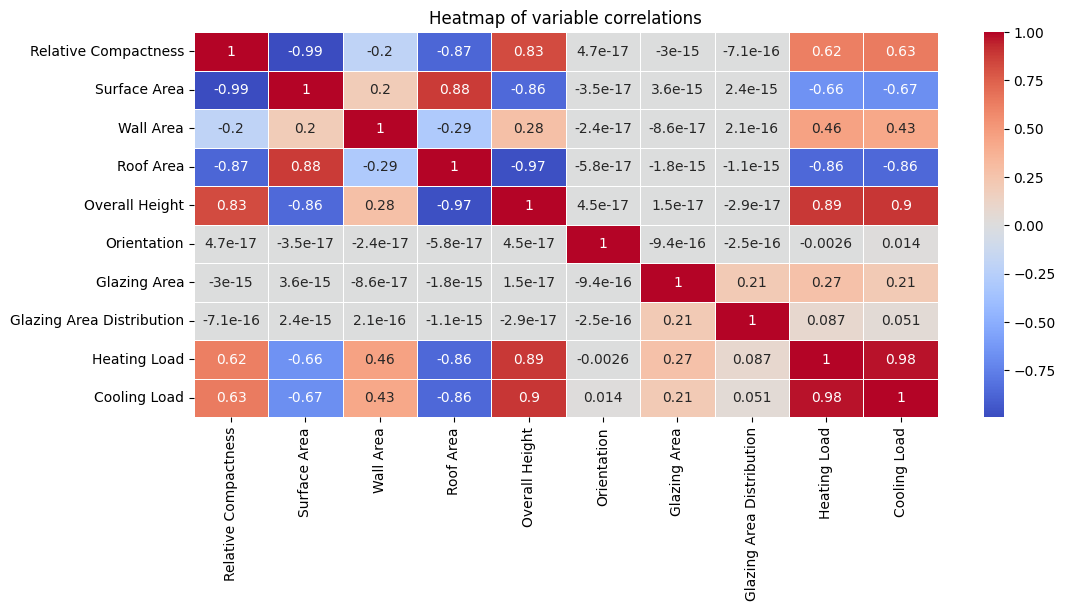

In [743]:
plt.figure(figsize = (12,5))
sb.heatmap(dataset.corr(), annot=True, linewidths=.5, cmap="coolwarm")
plt.title('Heatmap of variable correlations')
plt.show()

#### Do we need to delete a dependent variable?

La matrice de corrélations des différentes variables suggère une très forte corrélations positive entre le Heating Load et le Cooling Load (0.98), qui sont nos deux variables dépendante. Une première idée serait de supprimer l'une de ces deux variables pour réduire la complexité de notre problème. Dans ce cas-ci, on n'aurait besoin de prédire qu'une seule valeur à la place de deux.

Cependant, avant de faire cela, vérifions leur distribution :

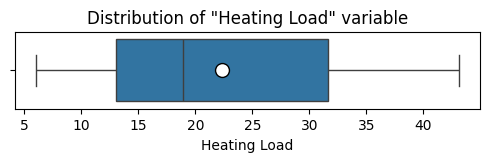

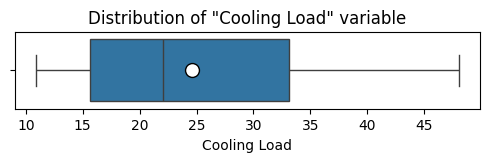

In [744]:
for variable in ['Heating Load', 'Cooling Load']:
    plt.figure(figsize = (6,1))
    sb.boxplot(x=dataset[variable], 
           showmeans = True,  
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},
           )
    plt.title(f'Distribution of "{variable}" variable')
    plt.show()

Le fait que deux variables soient fortement corrélées ne signifie pas nécessairement qu'elles ont la même distribution. La corrélation mesure la force et la direction d'une relation linéaire entre deux variables, mais elle ne capture pas la forme globale de la distribution.

Ici, dans notre cas, j'ai décidé de conserver les deux variables dépendantes malgrès leur forte corrélations du fait de leur distribution qui n'est pas identique. En effet, elles possèdent des valeurs minimale, maximal, médian, moyenne, 1er quartile, 3ème quartile de différentes. Supprimer l'une de ces deux variables pour n'en prédire qu'une seul serait une trop grosse simplification et ont perdrais énormément en performance lors de nos prédictions.

#### Do we need to delete an independent variable?

Continuons notre processus en analysant cette fois si les corrélations entre les variables indépendantes présent dans notre matrice de corrélations des variables. 

Ici, nous pouvons faire plusieurs constats:
- Les variables "Relative Compactness" ainsi que "Surface Area" sont très fortement corrélé entre elle (-0.99). Il faudra alors drop l'une de ces deux variables, car elles donnent la même informations. J'ai décidé de drop par la suite "Relative Compactness".
- De plus, les variables "Overall Height" et "Roof Area" sont également fortement corrélé entre elle (-0.97). J'ai donc égalemé décidé de drop une de ces variable "Roof Area".
- Cependant, la variable "Orientation" est au contraire très fortement décorrélé des autres. Elle a une corrélations de 0 pour chaque autres variables dépendantes / indépendantes. 
- Les variables "Glazing Area" et "Glazing Area Distribution" ont une très faible corrélations avec les autres variables indépendante.

Les supprimer permetrait de réduire la redondance d'information, simplifier le modèle, prévenir la multicollinéarité, réduire les coûts de calculs tout en améliorant l'interprétation des résultats. 

Comme nous avons vu précédemment, droppons dans un premier temps la variable "Surface Area" car elle est fortement corrélé avec "Relative Compactness"

In [745]:
dataset.drop("Relative Compactness", axis=1, inplace=True)

Il en est de même pour "Roof Area" comme nous avons vu précédemment

In [746]:
dataset.drop("Roof Area", axis=1, inplace=True)

Nous pouvons miantenant chercher à supprimer les variables indépendantes qui n'apporte pas d'informations aux variables dépendante.

Etudions donc les corrélations entre variables indépendantes / dépendantes :
- Il semblerait que les variables "Orientation" et "Glazing Area Distribution" ont une très faible corrélations avec les variables dépendantes.
- De plus, "Roof Area" et "Overall Height" ont une très forte corrélation avec nos valeurs à prédire. 
    
Mais devons nous drop les variables "Orientation" et "Glazing Area Distribution" pour autant car elles sont presque pas corrélées avec nos varaibles dépendantes pour réduire la dimensionalité de notre dataset ?

Nous devons voir si elles ont un impacts sur nos valeurs à prédires : 

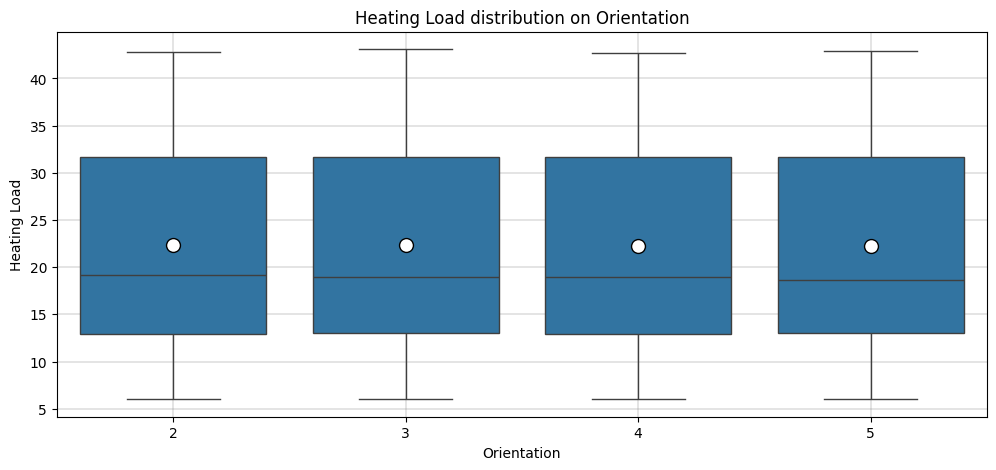

In [747]:
plt.figure(figsize = (12,5)) 

sb.boxplot(x="Orientation", y="Heating Load", data = dataset,
           showmeans = True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},
           )

plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
plt.title("Heating Load distribution on Orientation");

Ici, nous pouvons contaster que "l'orientation" n'a aucune implications sur le "Heating Load". En est-il de même pour le "Cooling Load" ? Normalement oui car elles sont fortement corrélé.

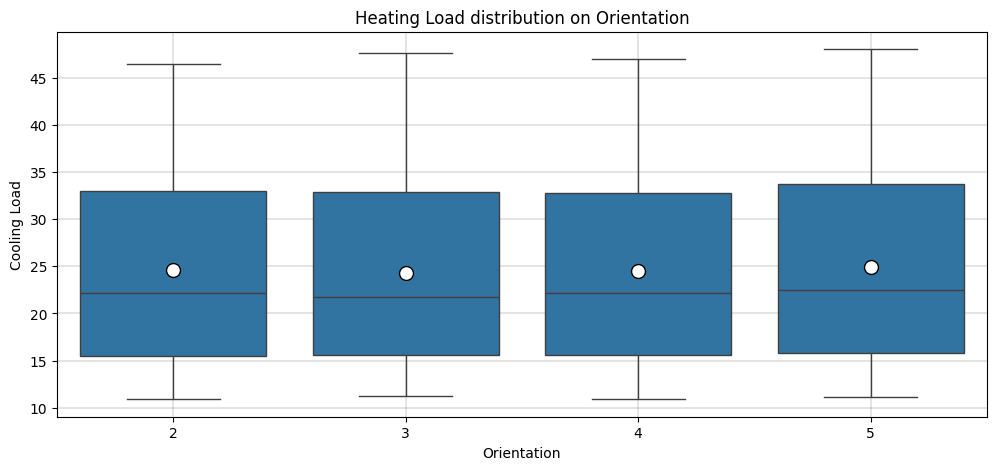

In [748]:
plt.figure(figsize = (12,5)) 

sb.boxplot(x="Orientation", y="Cooling Load", data = dataset,
           showmeans = True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},
           )

plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
plt.title("Heating Load distribution on Orientation");

La distribution de nos variables dépendantes étant identiques peut importe la valeurs de nos orientations, nous pouvons alors drop la colonne de l'orientation.

In [749]:
dataset.drop("Orientation", axis=1, inplace=True)

Quant est-il pour notre varibable "Glazing Area Distribution" ? Faisons de même.

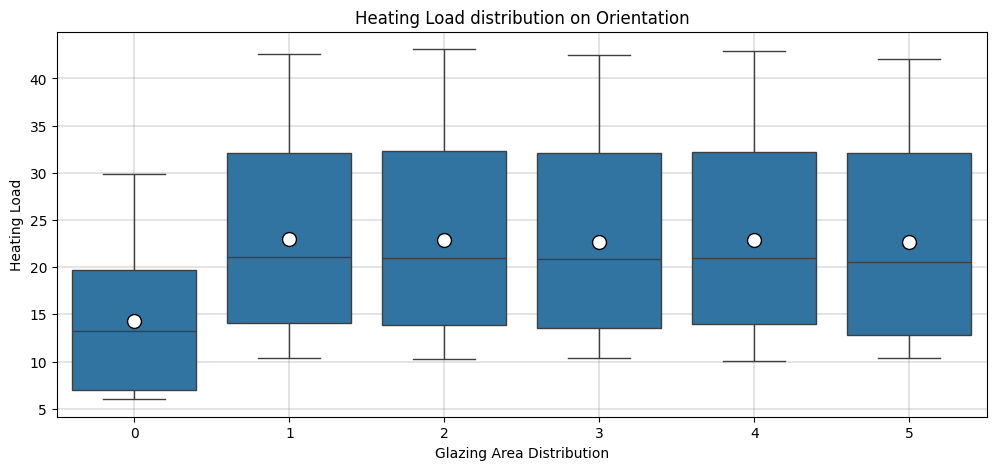

In [750]:
plt.figure(figsize = (12,5)) 

sb.boxplot(x="Glazing Area Distribution", y="Heating Load", data = dataset,
           showmeans = True, 
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},
           )

plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
plt.title("Heating Load distribution on Orientation");

Cette fois si, nous n'allons pas drop la variable "Glazing Area Distribution" car nous pouvons constater que cette varaible à un impact à un impact sur le "Heating Load" lorsquelle prend la valeur de 0. Nous n'allons donc pas vérifier pour le "Cooling Load".

La matrice de corrélation devient alors :

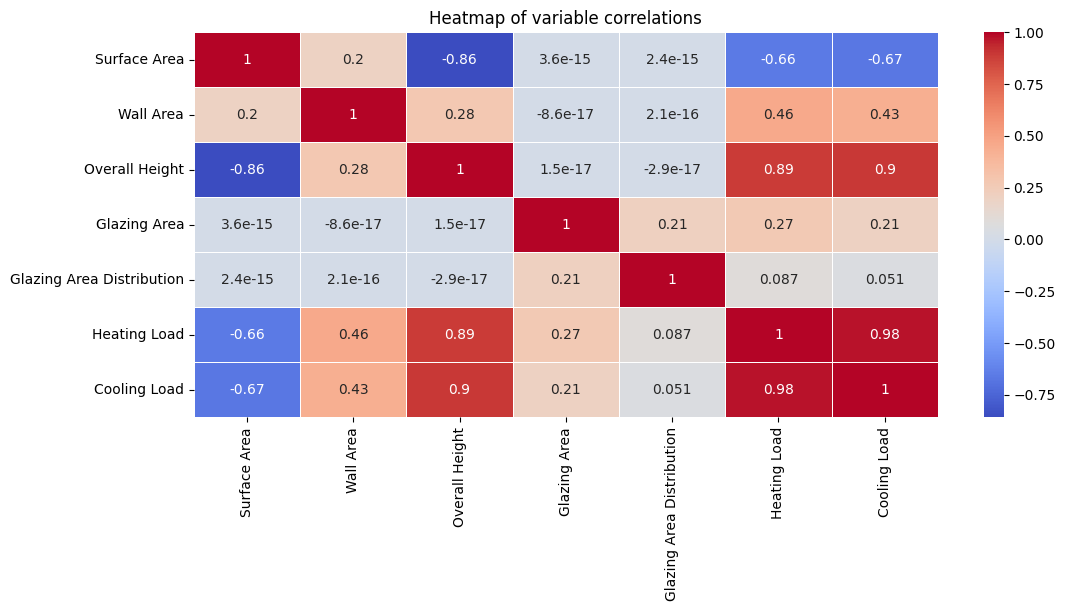

In [751]:
plt.figure(figsize = (12,5))
sb.heatmap(dataset.corr(), annot=True, linewidths=.5, cmap="coolwarm")
plt.title('Heatmap of variable correlations')
plt.show()

### 1.3.2 Transformation

Comme nous n'avons plus la variable "Orientation" a encodée car elle a était drop, nous n'avons pas d'autre encodage a réalisé. 

Nous allons plustard effectuer une normalisation de nos données une fois avoir split notre dataset.

Nous n'avons alors pas davantage de transformation a effectuer.

# 2. Model selection and evaluation
Maintenant que nous avons préparé nos données, nous pouvons nous attaquer à la partie concernant l'élaboration du model afin de prédire nos données dépendante.

## 2.1 Choose regression models
> **Subject :** Choose at least two regression models (e.g., linear regression, ridge regression, lasso regression) based on the dataset's characteristics and the problem at hand.

Durant notre cours, nous avons eu une présentation des models de régression : linear regssion (univariate, multivariate), logistic regression, lasso, ridge, NN. Il me parait évident d'utiliser l'un de ces types de modèles de régression.

Ici, la logistic regression n'est pas adapté, car nous voulons une régression et non une classification. Nous ne voulons pas un modèle de probability of a certain class or event.

Le problème que nous avons ne s'apparante pas un un problème de régression linéaire univarié, car nous avons plusieurs variables indépendante pour prédire nos valeurs dépendante. Dans un projets data, il est toujours important de partir sur des modèle simple avant d'utiliser des modèle plus complexe. C'est pourquoi j'ai décidé d'utiliser un modèle de régression linéaire multivariate. Le problème est peut être linéaire, nous ne pouvons le savoir que plustard. Si les modèles linéaires ne proposent pas d'assez bon résultats, il serait envisageable de recourir à des modèles polynomiaux.

Ici, nos independent variables are highly correlated, il peut être judicieux d'utiliser un Ridge. Ce modèle est used when the data suffers from multicollinearity, ce qui est notre cas.

Je pense que dans notre cas, Lasso n'est pas aussi bien adapté au problème que Ridge, car je pense que nos variables sont toutes  importantes pour la prédiction.

Il est important de noter que Lasso est Ridge sont en théorie adapté aux cas où nous disposons beaucoup de variables, ce qui n'est pas notre cas. Nous allons tout de même l'utiliser pour tester s'il fournit de meilleurs résultats dans notre cas que la régression linéaire et polynomiale.

## 2.2 Split dataset
> **Subject :** Split the dataset into training and testing sets.

In [752]:
X = dataset.drop(['Heating Load','Cooling Load'], axis=1)
y = dataset[['Heating Load','Cooling Load']]

In [753]:
X.sample(1)

,Surface Area,Wall Area,Overall Height,Glazing Area,Glazing Area Distribution
684,612.5,318.5,7.0,0.4,4


In [754]:
y.sample(1)

,Heating Load,Cooling Load
350,25.38,26.72


In [755]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [756]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 5), (231, 5), (537, 2), (231, 2))

## 2.3 Implement the selected models
> **Subject :** Implement the selected models using a scikit-learn library

### 2.3.1 Scaling
La standardisation des données est une étape essentielle dans le processus de prétraitement des données. Elle vise à mettre les variables sur une échelle commune afin de faciliter leur comparaison et leur utilisation dans des modèles d'apprentissage automatique.

Nous nous assurons alors que toutes les variables sont traitées de manière équitable et cohérente, ce qui améliore la performance des modèles d'apprentissage automatique et facilite l'interprétation des résultats. Cela permet également d'éviter que certaines variables avec des valeurs plus élevées ne dominent les autres dans les calculs et les estimations. 

In [757]:
scaler = StandardScaler()

In [758]:
X_train = scaler.fit_transform(X_train)

In [759]:
X_test = scaler.transform(X_test)

### 2.3.2 Create models

Dans cette section, nous allons instancier les différents modèles que j'ai sélectionné précédemment à l'aide de la bibliothèque sklearn.

Plus précisément, j'ai décidé de les stoquer dans une liste pour pouvoir loop par la suite dessus pour éviter d'écrire à plusieurs reprise le même code.

// TODO : delete Lasso ou le garder pour confirmer que c'est de la merde ?

In [760]:
models = [LinearRegression(), Ridge(), Lasso()]

## 2.4 Train models & Evaluate their performance
> **Subject :** Train the regression models on the training set and evaluate their performance on the testing set using appropriate metrics (e.g., mean squared error, R-squared).

Nous allons parcourir l'ensemble des modèles que nous avons instanciés pour les entraîner et calculer l'ensemble des métriques afin d'évaluer les modèles. Les résultats, qu'il s'agisse des valeurs prédites ou des valeurs des métriques, seront stockés dans un dataframe en vue d'une analyse future plus approfondie.

In [761]:
evaluate_models_classic = pd.DataFrame(columns=['Model Name', 'mse', 'r_squared', 'mae', 'Y predicted'])

In [762]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    name_model = model.__class__.__name__
    temp_df = pd.DataFrame({'Model Name': [name_model], 'mse': [mse], 'r_squared': [r2], 'mae': [mae], 'Y predicted': [y_pred]})
    evaluate_models_classic = pd.concat([evaluate_models_classic, temp_df], ignore_index=True)

C:\Users\charp\AppData\Local\Temp\ipykernel_8536\2728949752.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  evaluate_models_classic = pd.concat([evaluate_models_classic, temp_df], ignore_index=True)


In [763]:
evaluate_models_classic

,Model Name,mse,r_squared,mae,Y predicted
0,LinearRegression,10.034126,0.894419,2.314904,"[[19.878176353050765, 20.97945642685023], [13...."
1,Ridge,10.065655,0.894081,2.312143,"[[19.8791531647339, 20.983349259362367], [13.8..."
2,Lasso,12.817500,0.865087,2.601773,"[[18.530159999282816, 19.570008339643202], [14..."


Ici, nous pouvons constater que c'est le modèle de régression linéaire qui nous a fournit les meilleurs résultats suivis de très prêt par le Ridge. 

Par ailleurs, nos hypothèses vis à vis du Lasso sont confirmé. C'est le modèle qui nous a fournit les moins bonnes performances parmis les trois modèles utilisés.

On peut alors afficher uniquement les résultats du meilleurs modèle de manière dynamique :

In [764]:
min_mse_value = evaluate_models_classic['mse'].min()
row_with_min_mse = evaluate_models_classic[evaluate_models_classic['mse'] == min_mse_value]
row_with_min_mse

,Model Name,mse,r_squared,mae,Y predicted
0,LinearRegression,10.034126,0.894419,2.314904,"[[19.878176353050765, 20.97945642685023], [13...."


# 3. Interpretation and Recommendations:

> **Subject :** Interpret the coefficients of the regression models and analyse their significance.

Avant d'interpréter les coefficients de la régression, nous devons les afficher pour connaitre leur valeurs.

In [765]:
for model in models:
    name_model = model.__class__.__name__
    intercept = model.intercept_
    coefficients = model.coef_
    
    print(f'{name_model} :')
    print(f'- Intercept for predicting Heating Load  : {intercept[0]}')
    print(f'- Coefficients for predicting Heating Load  : {coefficients[0]}')
    print(f'- Intercept for predicting Cooling Load  : {intercept[1]}')
    print(f'- Coefficients for predicting Cooling Load  : {coefficients[1]}')
    print('\n')

LinearRegression :
- Intercept for predicting Heating Load  : 22.05050279329609
- Coefficients for predicting Heating Load  : [1.21891717 1.68204263 9.5278755  2.70741579 0.36396191]
- Intercept for predicting Cooling Load  : 24.287504655493482
- Coefficients for predicting Cooling Load  : [1.82063164 0.92243127 9.81253458 1.97374596 0.08787451]


Ridge :
- Intercept for predicting Heating Load  : 22.05050279329609
- Coefficients for predicting Heating Load  : [0.91014618 1.82906615 9.20552787 2.70198888 0.3630876 ]
- Intercept for predicting Cooling Load  : 24.287504655493482
- Coefficients for predicting Cooling Load  : [1.47295538 1.08944632 9.45086277 1.96958128 0.08712456]


Lasso :
- Intercept for predicting Heating Load  : 22.05050279329609
- Coefficients for predicting Heating Load  : [-0.          1.45967393  7.54582731  1.7812059   0.        ]
- Intercept for predicting Cooling Load  : 24.287504655493482
- Coefficients for predicting Cooling Load  : [-0.          0.98786863  

Comment lire ces coefficients ? C'est très simple il suffit de prendre la valeur de l'intersept, et de l'additionner à la somme de la multiplication des coefficient à la valeur de la variable associé. Je tiens a rappeler que les variables de l'études sont "Surface Area", "Wall Area", "Overrall Height", "Glazing Area", "Glazing Area Distribution". Par exemple dans le cadre du LineaRegression, pour prédire une nouevelle valeur, il faut effectuer le calcul suivant pour prédire le Heating Load : 22.05 + "Surface Area" * 1.2 + "Wall Area" * 1.6 + "Overrall Height" * 9.5 + "Glazing Area" * 2.7 + "Glazing Area Distribution" * 0.3. En effectuant ce calcul, nous pouvons retrouver la valeur du Heating Load prédite par le modèle de LinearRegression. Il suffit de faire de même pour le Cooling Load et les autres modèles pour retrouver les formules qu'effectuent chaque modèle.

Ici, nous pouvons constater que peut importe le modèle, nous avons uniquement des coefficient positif. Cela suggère que nos deux variables dépendantes augmentes plus chaque variable indépendante sont importantes.

Les coefficients vont de 0 à 9.8, chaque variables ont donc des importances variée dans la prédictions des variables dépendante. 

De plus, les intercepts sont identiques d'un modèle à un autre. Seul les coefficients associé aux variables indépendantes varient d'un modèle à un autre. Ainsi, lorsque toute les variables indépendante ont 0 comme valeur, les trois modèles fourniront la même prédiction.

Les coefficient du modèles Lasso sont en moyenne inférieures à celles des deux autres modèles.


> **Subject :** Provide insights into the key factors influencing the target variable.

Comme nous avons effectuer auparavant une standardisation, chaque variables sont placé sur une même échelle pour le modèle, sauf que le modèle fournit possède des coefficient différents pour chaque variable indépendante, ce qui montre que le modèle accode plus d'importance pour certaines variables lors des prédictions. Les trois moddèles testé sont d'accord sur le fait que la variable "Overrall Height" est sans aucun doute la plus importante lors de la prédictions des valeurs de Heating Load et Cooling Load. 

De plus, les trois modèles partagent également le point de vue que "Glazing Area Distribution" n'est pas très important dans les prédiction en octroyant un faible coefficient.

En plus de cela, le modèle Lasso indique que "Surface Area" n'apporte pas d'information dans la prédiction des deux valeurs dépendantes et fixe donc son coefficient à 0 suite à une régularization.

Les modèles ridge et de linéaire régression partagent le points de vue que "Glazing Area" est également un facteurs important suivis de "Wall Area" et de "Surface Area" pour la prédiction de Heating Load. Cependant pour la prédiction du Cooling Load, c'est l'inverse "Glazing Area" suivis de "Surface Area" puis de "Wall Area" (inverse pour les deux derniers).

Comme dans les prédictions, les modèles LinearRegression et Rdige performent mieu, il est donc important que tout les variables sont importantes dans la prédictions sauf 


> **Subject :** Based on your analysis, make recommendations or predictions for future observations.

Pour réduire le Heating Load et le cooling load de nouvelles constructions, il faut donc privilégier des bâtiments avec de faible hauteur de plafond puis de faible surface vitrée. En faisant cela, vous réduiserait considérablement vos charges.

Cela fait de sense car il y a plus de volumes de la pièce à chauffer ou a refroidir plus la hauteur est importante. De plus, si on allume le chauffage, cela signifie que dehors il fait plus froid, les fenêtre isolent moins bien que les murs plus épais, d'où les perte de chaleur. De même pour la climatisation.

Ainsi, on peut s'attendre à l'avance à des valeurs plus importantes pour le Heating Load et le Cooling Load si nous contstatons que le bâtiment possède d'importante valeur pour "Overrall Height", "Glazing Area" et  "Surface Area".

# 4. Neural Network Integration
## 4.1 Choose a suitable neural network architecture
> **Subject :** Choose a suitable neural network architecture for regression analysis. Justify your choice based on the characteristics of the dataset and the complexity of the problem.

Notre jeu de donnée n'est peut être pas linéairement séprable, c'est la raison pour laquelle, nous allons essayer d'utiliser un réseau de neuronne. Il peut être capable d'identifier des paternes complexes dans nos données afin de prédire nos différentes valeurs de Heating Load et de Cooling Load.

Notre réseau de neuronnes est une séquences de layers (inputs layer, hidden layer, output layers).

Comme nous avons 5 valeurs qui décrit nos bâtiments, notre réseau de neuronne doit alors avoir 5 neuronnes dans l'input layer. Un neuronne par variable.

De plus, nous cherchons à prédire deux valeurs (Heating Load et Cooling Load), notre output layer doit alors comporter deux neuronne. Une fonction d'activation linéaire va être utilisé pour les deux neuronnes car nous cherchons à prédire des valeurs continues.

Comme notre probléme est un problème simple où un un modèle de régression linéaire simple propose déjà de très bon résultat (r² de 0.89), il n'y aurait pas besoin de beaucoup de layers avec beaucoup de neuronnes dans l'input layer. J'ai décidé d'opter pour 2 layers de 64 et 12 neuronnes pour que notre modèle soit capable . Ce nombre de layer et de neuronne a était choisi après avoir essayé plusieurs valeurs et regardé quel est la combinaisons qui nous offre les meilleurs performance tout en ne demandant pas trop de temps pour la phase d'entrainement. En effet, plus on décide d'utiliser de neuronne et de layers, plus cela demande du temps à mettre à jours les poids et donc rallonge le temps de l'entrainement. De plus, j'ai décidé d'opter pour la fonction d'activation ReLU (Rectifier Linear Unit) pour introduire de la non linéarité dans notre modèle ainsi car il est beaucoup utilisé.

De plus, j'ai décidé d'utiliser un dropout layer en tant que technique de régularization afin de se prévenir de l'overfitting. Pour éviter que le modèle apprend trop bien nos données d'entraînement. Les dropout layers permettent d'ignorer une fractions des neuronnes à chaque itération de l'entrainement.

Pour mesurer la différence entre nos valeurs prédites de nos valeurs réelle, j'ai décidé d'utiliser la loss function Mean Squared Error car elle est souvent utilisé dans des problèmes de régression.

Mais il est important de souligner que je ne suis pas sûr que le réseau de neuronnes soit adapté dans notre cas car nous ne disposons de pas beaucoup de donnée (768 enregistrements), alors que les réseaux de neuronnes doivent posséder de grandes quantité de donné pour l'entrainement.

Nous allons tout de même expérimenter cette méthode pour tester s'il ne propose pas de meilleur résultat au cas où la distribution n'est pas linéaire.

## 4.2 Implement and train the neural network
> **Subject :** Implement and train the neural network using TensorFlow or a framework of your choice.

Nous allons maitennant constuire le réseau de neuronne qui a était présenté dans la partie précédante.

In [766]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(5,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(2, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error')

Entrainons maintenant notre neural network à l'aide du dataset d'entrainement

In [767]:
model_history = model.fit(X_train, y_train, epochs=250, batch_size=32)

Epoch 1/250
17/17 [==============================] - 1s 2ms/step - loss: 638.9059
Epoch 2/250
17/17 [==============================] - 0s 2ms/step - loss: 625.1769
Epoch 3/250
17/17 [==============================] - 0s 2ms/step - loss: 610.8326
Epoch 4/250
17/17 [==============================] - 0s 2ms/step - loss: 589.0849
Epoch 5/250
17/17 [==============================] - 0s 1ms/step - loss: 557.9903
Epoch 6/250
17/17 [==============================] - 0s 2ms/step - loss: 513.4017
Epoch 7/250
17/17 [==============================] - 0s 1ms/step - loss: 450.5504
Epoch 8/250
17/17 [==============================] - 0s 1ms/step - loss: 380.9561
Epoch 9/250
17/17 [==============================] - 0s 2ms/step - loss: 290.8744
Epoch 10/250
17/17 [==============================] - 0s 2ms/step - loss: 199.8125
Epoch 11/250
17/17 [==============================] - 0s 2ms/step - loss: 117.8890
Epoch 12/250
17/17 [==============================] - 0s 2ms/step - loss: 74.7459
Epoch 13/250
1

17/17 [==============================] - 0s 2ms/step - loss: 35.2674
Epoch 20/250
17/17 [==============================] - 0s 2ms/step - loss: 37.5582
Epoch 21/250
17/17 [==============================] - 0s 1ms/step - loss: 36.4924
Epoch 22/250
17/17 [==============================] - 0s 1ms/step - loss: 34.2664
Epoch 23/250
17/17 [==============================] - 0s 1ms/step - loss: 34.9140
Epoch 24/250
17/17 [==============================] - 0s 1ms/step - loss: 36.9831
Epoch 25/250
17/17 [==============================] - 0s 1ms/step - loss: 34.4476
Epoch 26/250
17/17 [==============================] - 0s 1ms/step - loss: 33.5298
Epoch 27/250
17/17 [==============================] - 0s 1ms/step - loss: 33.4271
Epoch 28/250
17/17 [==============================] - 0s 1ms/step - loss: 34.7746
Epoch 29/250
17/17 [==============================] - 0s 2ms/step - loss: 32.0837
Epoch 30/250
17/17 [==============================] - 0s 1ms/step - loss: 33.1664
Epoch 31/250
17/17 [=========

Afin de déterminer le nombre d'époque sur lesquels je dois entrainer le neural network en évitant tout overfitting/underfitting, j'ai décidé d'afficher la train loss en fonction du nombre d'époque. Nous devons arréter d'entrainer le modèle une fois que la train loss devient constante ou commence à augmenter.

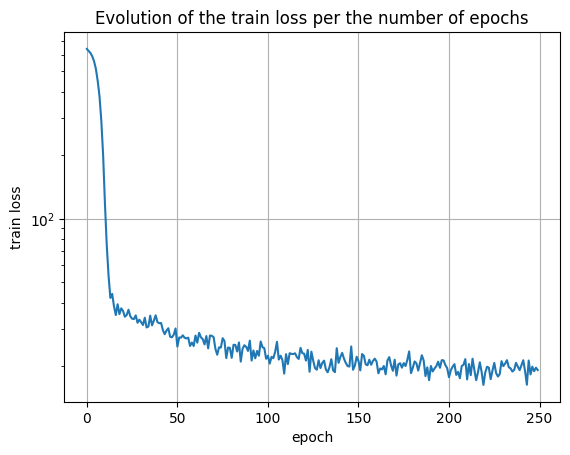

In [768]:
plt.plot(model_history.history['loss'])
plt.title('Evolution of the train loss per the number of epochs')
plt.ylabel('train loss')
plt.xlabel('epoch')
plt.grid()
plt.yscale('log')
plt.show()

The fitting process appears to converge around the 250th epoch, suggesting that the model's performance stabilizes and further epochs may not significantly enhance performance.

We can identify it as soon as the train loss no longer moves, or starts to rise slightly.

We can identify small bumps on the curve here; this is due to the regularization method, which is dropout that forgets certain weights of the model.

Nous pouvons évaluer les performances de notre modèle sur le jeu de donnée de test :

In [769]:
mse = model.evaluate(X_test, y_test.values)
print('MSE :', mse)

8/8 [==============================] - 0s 2ms/step - loss: 6.2321
MSE : 6.232125282287598


A titre de comparaison, en retirant les dropout layers, on obtient un mse de 5.23, ce qui est nettement inférieur à celui obtenus avec les méthodes classiques de machine learning (régression linéaire).

Faisons un petit récapitulatif du contenu de notre réseau de neuronne, des différentes couches :

In [770]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 64)                384       
                                                                 
 dropout_26 (Dropout)        (None, 64)                0         
                                                                 
 dense_40 (Dense)            (None, 12)                780       
                                                                 
 dropout_27 (Dropout)        (None, 12)                0         
                                                                 
 dense_41 (Dense)            (None, 2)                 26        
                                                                 
Total params: 1190 (4.65 KB)
Trainable params: 1190 (4.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Effectuons maintenant les prédictions sur le jeu de test car la méthode précédente d'évaluation ne permettait pas de les récupérer.

In [771]:
y_pred = model.predict(X_test)

8/8 [==============================] - 0s 2ms/step


In [772]:
y_pred.shape

(231, 2)

Affichons maintenant nos valeurs prédites en fonction des valeurs réel à l'aide de scatter plot. J'ai décidé d'utiliser une fonction pour éviter le code répétitif pour afficher les informations du Heating Load séparément de ceux du Cooling Load.

In [773]:
def display_real_predict_values(y_real, y_pred, color="red", title='Neural Network Regression: Real vs. Predicted'):
    plt.scatter(y_real, y_pred, color=color)
    plt.plot([min(y_real), max(y_real)], [min(y_real), max(y_real)], linestyle='--', color='grey', linewidth=2)
    plt.title(title)
    plt.xlabel('Real Values')
    plt.ylabel('Predicted Values')
    plt.grid()
    plt.show()

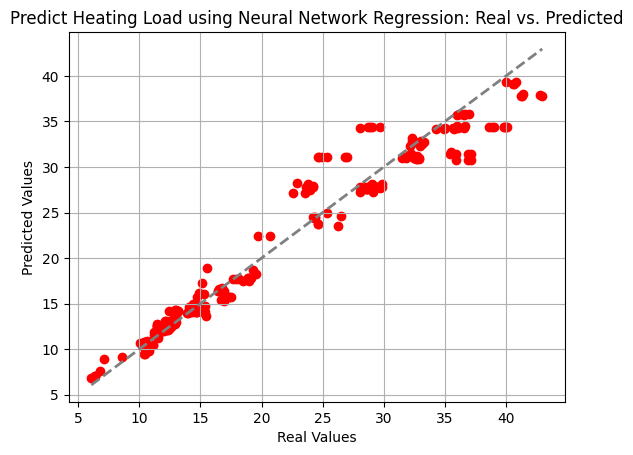

In [774]:
display_real_predict_values(y_test.values[:,0], y_pred[:,0], title='Predict Heating Load using Neural Network Regression: Real vs. Predicted')

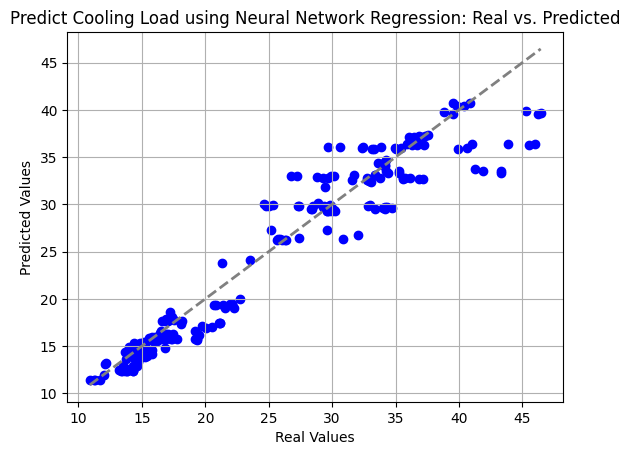

In [775]:
display_real_predict_values(y_test.values[:,1], y_pred[:,1], color="blue", title='Predict Cooling Load using Neural Network Regression: Real vs. Predicted')

Nous pouvons maintenante chercher à évaluer les performances du model obtenus, en calculant le mse, r² et mae.

In [776]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

Nous stockons les résultats dans un dataframe pour une étude ultérieur de ces derniers.

In [777]:
evaluate_model_ann = pd.DataFrame({'Model Name': ['Neural Network'], 'mse': [mse], 'r_squared': [r2], 'mae': [mae], 'Y predicted': [y_pred]})
evaluate_model_ann

,Model Name,mse,r_squared,mae,Y predicted
0,Neural Network,6.232126,0.934047,1.682976,"[[16.415451, 17.724695], [14.221854, 15.895107..."


## 4.3 Compare the performance
> **Subject :** Compare the performance of the neural network with the traditional regression models selected earlier. Consider metrics such as mean squared error, R-squared, and any other relevant evaluation metrics.

Afin de comparer les performances du réseau neuronal par rapport aux autres modèles de régression plus classiques sélectionnés auparavant, j'ai décidé de concaténer les deux dataframes qui contiennent le récapitulatif des performances de chaque modèle. Cette fusion permettra de faciliter les futures visualisations, facilitant ainsi la comparaison entre les différents modèles.

In [778]:
df_evaluate_models = pd.concat([evaluate_models_classic, evaluate_model_ann], ignore_index=True)

In [779]:
df_evaluate_models

,Model Name,mse,r_squared,mae,Y predicted
0,LinearRegression,10.034126,0.894419,2.314904,"[[19.878176353050765, 20.97945642685023], [13...."
1,Ridge,10.065655,0.894081,2.312143,"[[19.8791531647339, 20.983349259362367], [13.8..."
2,Lasso,12.817500,0.865087,2.601773,"[[18.530159999282816, 19.570008339643202], [14..."
3,Neural Network,6.232126,0.934047,1.682976,"[[16.415451, 17.724695], [14.221854, 15.895107..."


Et si nous représentions les valeurs métriques graphiquement plutôt que sous forme de tableau de données ?

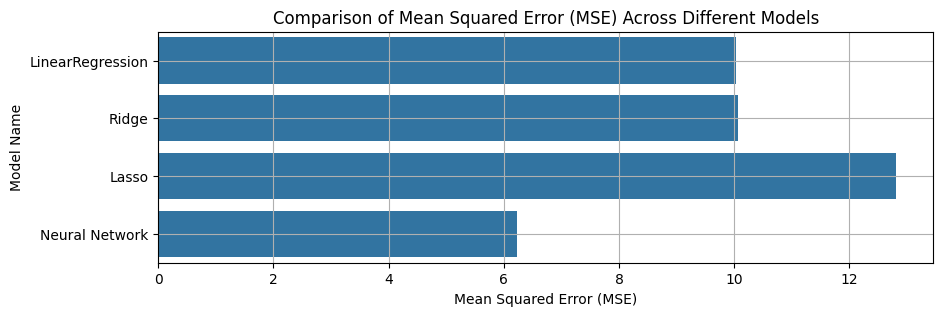

In [780]:
plt.figure(figsize = (10,3))
sb.barplot(data=df_evaluate_models,            
    x="mse",
    y="Model Name"
)

plt.title('Comparison of Mean Squared Error (MSE) Across Different Models')
plt.ylabel('Model Name')
plt.xlabel('Mean Squared Error (MSE)')
plt.grid()

plt.show()

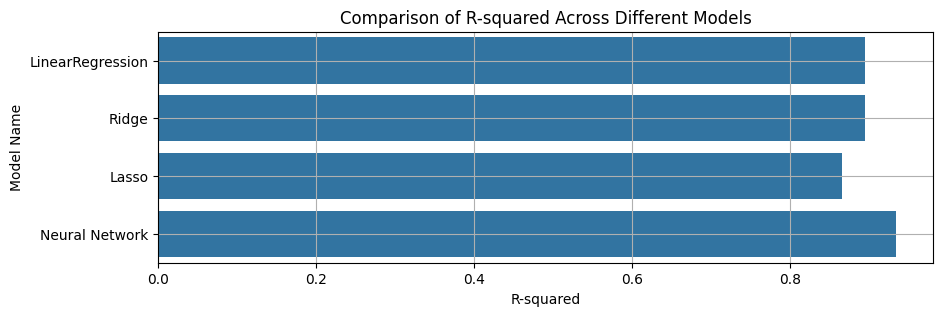

In [781]:
plt.figure(figsize = (10,3))
sb.barplot(data=df_evaluate_models,            
    x="r_squared",
    y="Model Name"
)

plt.title('Comparison of R-squared Across Different Models')
plt.ylabel('Model Name')
plt.xlabel('R-squared')
plt.grid()

plt.show()

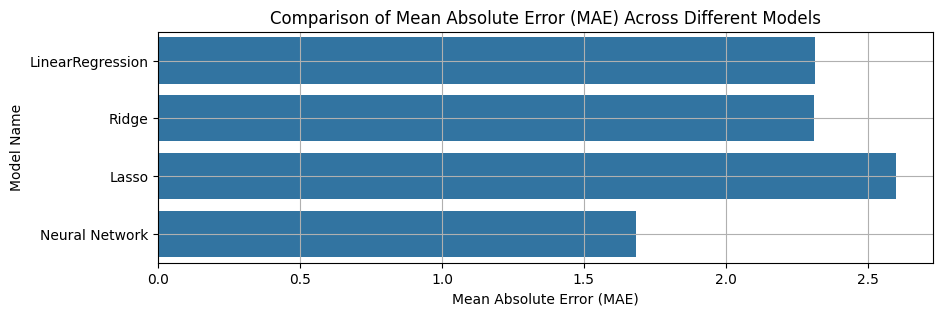

In [782]:
plt.figure(figsize = (10,3))
sb.barplot(data=df_evaluate_models,            
    x="mae",
    y="Model Name"
)

plt.title('Comparison of Mean Absolute Error (MAE) Across Different Models')
plt.ylabel('Model Name')
plt.xlabel('Mean Absolute Error (MAE)')
plt.grid()

plt.show()

La configuration du Neural Network choisie surpasse nettement les modèles de régression classiques qui ont étaient choisi en termes de performances de prédictions pure. Ceci peut est observé par une valeur beaucou plus faible du MSE et du MAE, ainsi que d'une valeur plus importante pour le R². Par conséquent, sur la base de ces métriques, le Neural Network serait le choix préféré pour ce problème de régression spécifique.

Dans l'analyse du graphique de l'évolution du Mean Squared Error (MSE), une observation notable est que le MSE du réseau neuronal est environ deux fois inférieur à celui du modèle Lasso. Il est important de souligner que le MSE mesure la moyenne des carrés des erreurs entre les valeurs prédites et les valeurs réelles. Ainsi, un MSE plus faible indique une meilleure adéquation du modèle aux données d'entraînement.

Nous pouvons maintenant nous demander si la performance de chaque modèle dépend de la valeur à prédire. 

Pour se faire, nous pouvons décider d'afficher les valeurs prédite en fonction des valeurs réel et cela pour chaque model. Cette approche nous permettra d'identifier d'éventuelles variations de performance en fonction des plages de valeurs à prédire et d'obtenir ainsi un aperçu plus détaillé des forces et faiblesse de chaque modèle dans les prédictions à effectuer.

Commençons par la variable du Heating Load : 

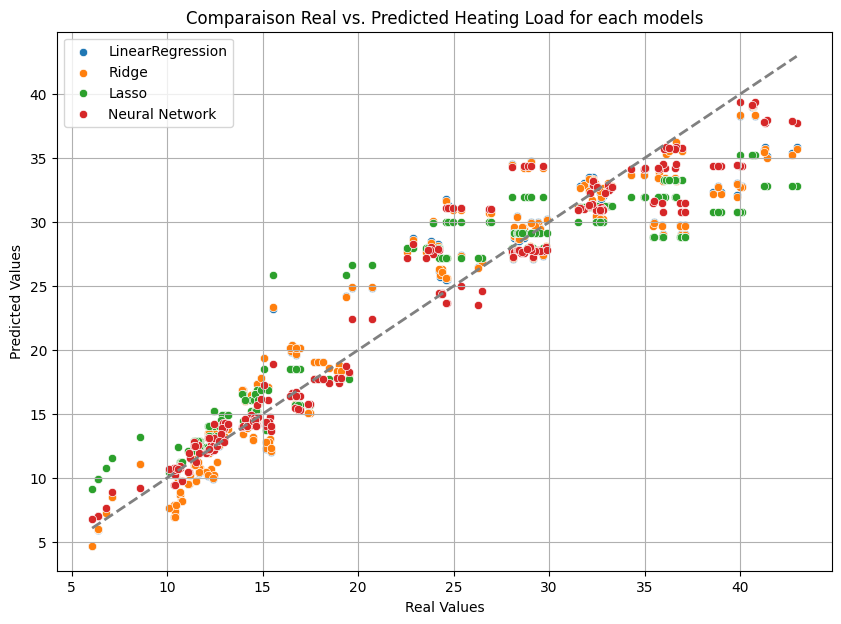

In [783]:
plt.figure(figsize=(10, 7))

for idx_models in range(len(df_evaluate_models['Y predicted'])):
    y_pred = df_evaluate_models['Y predicted'][idx_models][:,0]
    model_name = df_evaluate_models['Model Name'][idx_models]
    sb.scatterplot(x=y_test.values[:,0], y=y_pred, label=model_name)

plt.title('Comparaison Real vs. Predicted Heating Load for each models')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')

plt.plot([min(y_test.values[:,0]), max(y_test.values[:,0])], [min(y_test.values[:,0]), max(y_test.values[:,0])], linestyle='--', color='grey', linewidth=2)
plt.grid()

plt.show()

Le graphique précédent met en évidence une nette supériorité de la précision du réseau neuronal par rapport aux modèles plus traditionnels lorsque les valeurs réelles sont faibles. Cependant, pour des valeurs réelles élevées, la dispersion demeure sensiblement similaire à celle des modèles classiques. Cette observation suggère que notre modèle de réseau neuronal est plus apte à identifier des informations cruciales pour prédire des valeurs faibles de Heating Load par rapport à nos modèles classiques.

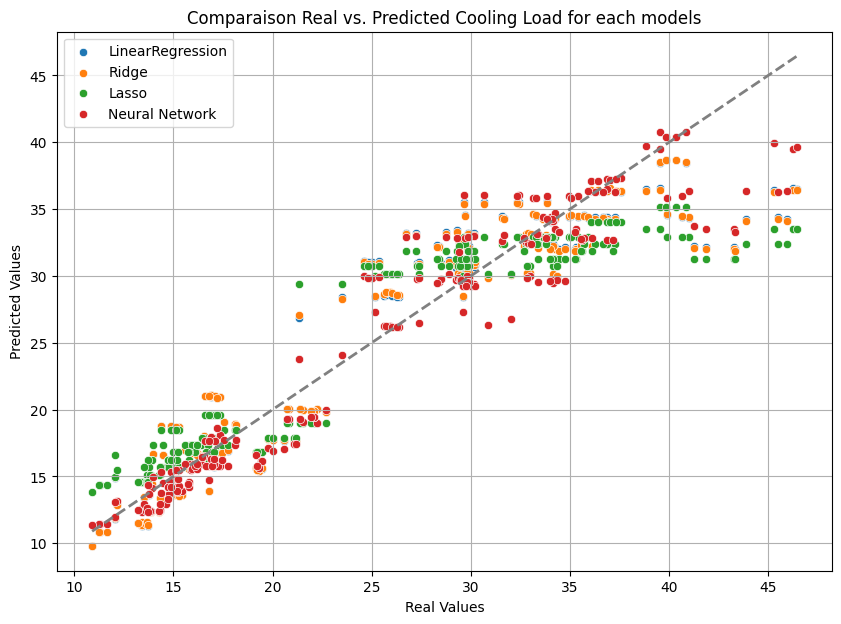

In [784]:
plt.figure(figsize=(10, 7))

for idx_models in range(len(df_evaluate_models['Y predicted'])):
    y_pred = df_evaluate_models['Y predicted'][idx_models][:,1]
    model_name = df_evaluate_models['Model Name'][idx_models]
    sb.scatterplot(x=y_test.values[:,1], y=y_pred, label=model_name)

plt.title('Comparaison Real vs. Predicted Cooling Load for each models')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')

plt.plot([min(y_test.values[:,1]), max(y_test.values[:,1])], [min(y_test.values[:,1]), max(y_test.values[:,1])], linestyle='--', color='grey', linewidth=2)
plt.grid()

plt.show()

Il est en également de même pour l'autre variable indépendante qui est le Cooling Load.

# Conclusion

Nous avons ici vu que le réseau de neuronnes avec deux hidden layers de 64 et 12 neuronnes nous offres de meilleurs performances que des modèles de régression plus classique comme le Ridge, Régression Linéaire, Lasso. 

Cependant, faut-il tout de même partir sur un réseau de neuronne ? 

Le résultats des réseaux de neuronnes est plus complexes à comprendre que ceux des modèlesp lus classiques où la prédictions repose uniquement sur une équation très simple (dans notre cas 5 coefficient et un intercept) et non sur une matrice de poids pour notre réseau de neuronnes. Cela entraine donc interprétation des résultats plus délicate pour notre réseau de neuronne. Il peut être difficile de comprendre comment chaque caractéristique influence la prédiction, en particulier dans les couches cachées du réseau, alors que ceci est très simple pour nos modèles de régression classique comme nous avons pu l'observer dans la troisième partie.

De plus, il est important de garder en mémoire que l'entrainement du réseau de neuronne prend plus de temps et de puissance de calcul que les autres modèles plus classiques. Il faudrait donc voir avec les personnes qui pourraient se servir de notre modèle, si les performances obtenus avec les modèles classiques leur conviennent avant d'élaborer un modèle plus complexe avec du deep learning.

il est cependant important de noter que plus ont donne de données à notre modèle de neural network, plus celui-ci sera en mesure d'identifier les bonnes informations pour prédires les valeurs et donc améliorer ces prédictions.

Par ailleurs, qu'il est important de noter que les résultats du réseau neuronal dépendent de la configuration choisie plutôt que du type de modèle en tant que tel. Par exemple, j'avais initialement essayé un modèle avec un seul hidden layer de 6 neurones, cependant il affichait des résultats inférieurs aux deux autres modèles. J'avais également testé une configuration avec deux layers de 12 neurones, et les résultats étaient similaires à ceux du Ridge. La configuration du réseau de neurones a donc un impact significatif sur les résultats obtenus et donc la performance du modèles à prédire les valeurs. Il n'est pas possible d'affirmer que ce modèle sera meilleur dans tous les cas.

Avant de dire lequel de ces modèles est le plus adapté à notre besoin (qui est de prédire Heating Load et Cooling Load), il serait judicieux d'effectuer les améliorations suivantes et de comparer les résultats obtenus. Nous n'avons pas cherché à optimisé les résultats des modèles classiques alors que je n'ai pas prit la solution la moins performante pour le réseau de neuronne.

Améliorations possible:
- Comme nous avons vu précédemment, les hyperparamètres ont une influence importantes sur la capacité du modèle à fournir de bonne prédiction. Une optimisation des hyperparamètres pour les modèles classiques (Linear Regression, Lasso, Ridge) ainsi que pour le réseau neuronal pourait améliorer leurs performancess. Cela consite à tester différentes combinaisons de paramètres afin de trouver la configuration optimale qui maximise les performances du modèle. GridSearchCV (pour les modèles classiques) et KerasTunner (pour le neural network) peuvent être utilisées pour l'effectuer. Je ne l'ai pas fait car le sujet de l'assignement demandé de split le dataset en seulement train/test sans le validation set et car ce n'était pas demandé de l'effectuer dans le sujet.
- Une deuxième piste d'amélioration serait l'utilisation de la validation croisée pour réduire le risque de surajustement ou de sous-ajustement des modèls à un seul ensemble de données.
- Ajouter des variables supplémentaire à partir des feature que l'on possède, pourrait avoir un impact sur la précision des modèle. Je ne l'ai pas fais car je n'avais pas d'idée de feature à créer.